In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pickle

## Download the dataset

In [2]:
df = pd.read_csv('data/CETUC_Features_data.csv')
df.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
0,F003-0616.wav,24,179.803615,-0.453240,-1.540080,205.0,115.0,48.534356,110.286762,240.0,115.0,220.00,105.00,0
1,F000-0823.wav,19,341.033840,-0.369161,0.038563,385.0,450.0,164.185352,30.000000,695.0,252.5,447.50,195.00,0
2,M009-0399.wav,29,164.397878,0.870209,-0.357094,120.0,15.0,155.589382,7.538462,530.0,15.0,225.00,210.00,1
3,F033-0492.wav,25,199.400000,0.323917,-1.207102,180.0,0.0,188.384288,0.000000,575.0,0.0,370.00,370.00,0
4,M029-0430.wav,24,196.576417,0.800030,-0.598433,180.0,145.0,56.701576,140.000000,320.0,145.0,238.75,93.75,1


## Split the dataset into training and test data
Let's use 20% of the database for testing.

We also need to make sure the classes(Genders) are equally distributed between the classes.

In [3]:
mydata_train, mydata_test = train_test_split(df, random_state=0, test_size=0.35)

print(f'Feminine voices in the training data: {len(mydata_train.Gender)- sum(mydata_train.Gender)}')
print(f'Masculine voices in the training data: {sum(mydata_train.Gender)}')
print(f'Feminine voices in the test data: {len(mydata_test.Gender)- sum(mydata_test.Gender)}')
print(f'Masculine voices in the test data: {sum(mydata_test.Gender)}')


Feminine voices in the training data: 33131
Masculine voices in the training data: 32517
Feminine voices in the test data: 17866
Masculine voices in the test data: 17484


In [4]:
mydata_train.head()

,FileName,nobs,mean,skew,kurtosis,median,mode,std,low,peak,q25,q75,iqr,Gender
80896,F014-0104.wav,26,201.602564,0.579508,0.303338,222.5,15.0,145.426341,15.0,580.0,52.5,236.25,183.75,0
7018,M015-0710.wav,17,308.529412,0.015176,-0.843063,325.0,0.0,198.522222,0.0,625.0,185.0,400.00,215.00,1
33057,M002-0209.wav,38,106.578947,1.284194,1.146617,0.0,0.0,139.397695,0.0,545.0,0.0,190.00,190.00,1
85984,F047-0880.wav,20,331.750000,0.300773,-0.510601,277.5,0.0,245.933299,0.0,895.0,187.5,467.50,280.00,0
47112,F025-0368.wav,34,324.259156,1.463234,2.233437,235.0,115.0,225.132761,55.0,1110.0,185.0,503.75,318.75,0


In [5]:
data_x_train = mydata_train[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_train = mydata_train[['Gender']].copy().values.ravel()
data_x_test = mydata_test[['nobs', 'mean', 'skew', 'kurtosis', 'median', 'mode', 'std', 'low', 'peak', 'q25', 'q75', 'iqr']].copy()
y_test = mydata_test[['Gender']].copy().values.ravel()

In [6]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(data_x_train), columns=data_x_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(data_x_test), columns=data_x_test.columns)

In [7]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/DecisionTree.sav'
pickle.dump(tree, open(filename, 'wb'))
print("\nDecision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

#Train random forest model
forest = RandomForestClassifier(n_estimators=5, random_state=0).fit(X_train, y_train)
filename = 'models/RandomForest.sav'
pickle.dump(forest, open(filename, 'wb'))
print("\nRandom Forests")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

#Train gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/GradientBoosting.sav'
pickle.dump(gbrt, open(filename, 'wb'))
print("\nGradient Boosting")
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

#Train support vector machine model
svm = SVC().fit(X_train, y_train)
filename = 'models/SVM.sav'
pickle.dump(svm, open(filename, 'wb'))
print("\nSupport Vector Machine")
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

#Train neural network model
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
filename = 'models/MLP.sav'
pickle.dump(mlp, open(filename, 'wb'))
print("\nMultilayer Perceptron")
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


Decision Tree
Accuracy on training set: 1.000
Accuracy on test set: 0.836

Random Forests
Accuracy on training set: 0.984
Accuracy on test set: 0.870

Gradient Boosting
Accuracy on training set: 0.862
Accuracy on test set: 0.859

Support Vector Machine
Accuracy on training set: 0.846
Accuracy on test set: 0.846

Multilayer Perceptron
Accuracy on training set: 0.875
Accuracy on test set: 0.869


In [ ]:
def plot_feature_importances_mydata(model, c):
    n_features = len(X_train.columns)
    plt.figure(1,figsize=(18,10))
    plt.bar(range(n_features), model.feature_importances_, align='center', color=c)
    plt.xticks(np.arange(n_features), X_train.columns)
    plt.ylabel("Variable importance")
    plt.xlabel("Independent Variable")
    plt.title(model.__class__.__name__)
    plt.show()

In [ ]:
plot_feature_importances_mydata(tree,'blue')

In [ ]:
import tensorflow as tf
from tensorflow import keras

NeuralNetwork = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

NeuralNetwork.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = NeuralNetwork.fit(X_train, y_train,validation_split=0.2, epochs=100, verbose=4)

test_loss, test_acc = NeuralNetwork.evaluate(X_test,  y_test, verbose=0)


print('\nTest accuracy:', test_acc)

Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78/100
Epoch 79/100
Epoch 80/100
Epoch 81/100
Epoch 82/100
Epoch 83/100
Epoch 84/100
Epoch 85/100
Epoch 86/100
Epoch 87/100
Epoch 88/100
Epoch 89/100
Epoch 90/100
Epoch 91/100
Epoch 92/100
Epoch 93/100
Epoch 94/100
Epoch 95/100
Epoch 96/100
Epoch 97/100
Epoch 98/100
Epoch 99/100
Epoch 100/100

Test accuracy: 0.8659405708312988


/home/brunohonorio/tcc/Speaker-Gender-Recognition/venv/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


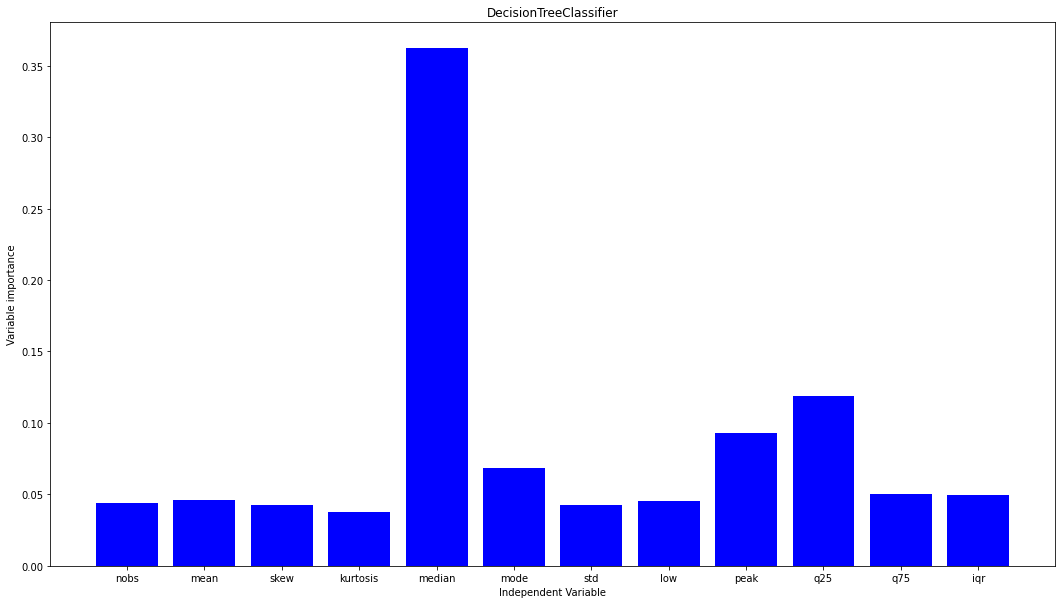

Epoch 1/100


Epoch 2/100


Epoch 3/100


Epoch 4/100


Epoch 5/100


Epoch 6/100


Epoch 7/100


Epoch 8/100


Epoch 9/100


Epoch 10/100


Epoch 11/100


Epoch 12/100


Epoch 13/100


Epoch 14/100


Epoch 15/100


Epoch 16/100


Epoch 17/100


Epoch 18/100


Epoch 19/100


Epoch 20/100


Epoch 21/100


Epoch 22/100


Epoch 23/100


Epoch 24/100


Epoch 25/100


Epoch 26/100


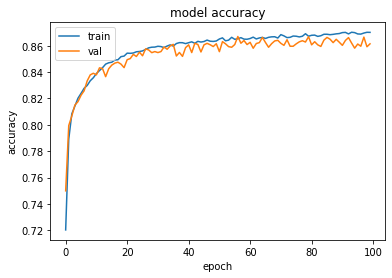

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 27/100


Epoch 28/100


Epoch 29/100


Epoch 30/100


Epoch 31/100


Epoch 32/100


Epoch 33/100


Epoch 34/100


Epoch 35/100


Epoch 36/100


Epoch 37/100


Epoch 38/100


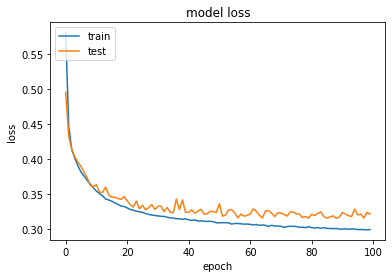

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()